## PRODUCT SALES FOR E COMPANY

### appendix 
-click on links: 

> <a href=#imports>Import libraries</a>

> <a href=#load>Load data</a>

> <a href=#formating>Data formating</a>


> <a href=#EDA>Explratory data analysis</a>

> <a href=#Questions>Questions</a>

> <a href=#Qun>Qunclosion</a>

# <a name=imports> Import libraries</a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 
#%config InlineBackend.figure_format = 'svg'

# <a name=load>Load data</a>

In [2]:
df = pd.read_csv('Sales_April_2019.csv',
                 # to show data without (;)
                 #, index_col = 0
                 )

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


# <a name=formating>Data formating</a>

In [56]:
# i need to change data format of four colums :order id ,Order Date, Quantity Ordered,Price Each 
df['Order ID'] = df['Order ID'].astype(int)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17537 entries, 0 to 18382
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          17537 non-null  int32         
 1   Product           17537 non-null  object        
 2   Quantity Ordered  17537 non-null  float64       
 3   Price Each        17537 non-null  float64       
 4   Order Date        17537 non-null  object        
 5   Purchase Address  17537 non-null  object        
 6   Date              17537 non-null  datetime64[ns]
 7   total             17537 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 1.1+ MB


In [59]:
#put date in new col
df['Date'] = df['Order Date'].str.split(' ').str[0]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,total
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,600.00
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04/30/19,11.99
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04/29/19,11.95


In [8]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%y', errors='coerce')

In [60]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']).astype(int)

In [62]:
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17537 entries, 0 to 18382
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          17537 non-null  int32  
 1   Product           17537 non-null  object 
 2   Quantity Ordered  17537 non-null  int32  
 3   Price Each        17537 non-null  float64
 4   Order Date        17537 non-null  object 
 5   Purchase Address  17537 non-null  object 
 6   Date              17537 non-null  object 
 7   total             17537 non-null  float64
dtypes: float64(2), int32(2), object(4)
memory usage: 1.1+ MB


In [13]:
# for loop to see duplicated data 
for col in df.columns:
    
    print(df[col].value_counts())

193511.0    4
178158.0    4
191742.0    3
176797.0    3
182523.0    3
           ..
176606.0    1
180561.0    1
182550.0    1
184706.0    1
184345.0    1
Name: Order ID, Length: 17537, dtype: int64
Lightning Charging Cable      2201
USB-C Charging Cable          2079
AA Batteries (4-pack)         2063
AAA Batteries (4-pack)        1989
Wired Headphones              1890
Apple Airpods Headphones      1515
Bose SoundSport Headphones    1280
27in FHD Monitor               734
iPhone                         693
34in Ultrawide Monitor         650
Google Phone                   581
27in 4K Gaming Monitor         563
Flatscreen TV                  458
Macbook Pro Laptop             453
ThinkPad Laptop                392
20in Monitor                   390
Vareebadd Phone                220
LG Dryer                        77
LG Washing Machine              61
Product                         35
Name: Product, dtype: int64
1.0    16558
2.0     1328
3.0      299
4.0       72
5.0       24
6.0      

In [14]:
df['Product'].value_counts()

Lightning Charging Cable      2201
USB-C Charging Cable          2079
AA Batteries (4-pack)         2063
AAA Batteries (4-pack)        1989
Wired Headphones              1890
Apple Airpods Headphones      1515
Bose SoundSport Headphones    1280
27in FHD Monitor               734
iPhone                         693
34in Ultrawide Monitor         650
Google Phone                   581
27in 4K Gaming Monitor         563
Flatscreen TV                  458
Macbook Pro Laptop             453
ThinkPad Laptop                392
20in Monitor                   390
Vareebadd Phone                220
LG Dryer                        77
LG Washing Machine              61
Product                         35
Name: Product, dtype: int64

# <a name=EDA>Explratory data analysis(EDA)</a>

In [17]:
df.describe()

,Order ID,Quantity Ordered,Price Each
count,18289.000000,18289.00000,18289.000000
mean,185328.816720,1.12461,184.431026
std,5061.520829,0.43641,330.913377
min,176558.000000,1.00000,2.990000
25%,180952.000000,1.00000,11.950000
50%,185328.000000,1.00000,14.950000
75%,189706.000000,1.00000,150.000000
max,194094.000000,7.00000,1700.000000


In [18]:
df.isna().sum(axis=0)

Order ID            94
Product             59
Quantity Ordered    94
Price Each          94
Order Date          59
Purchase Address    59
Date                94
dtype: int64

In [19]:
df.shape

(18383, 7)

In [20]:
df.dropna(how='all', inplace=True)

In [21]:
df.shape

(18324, 7)

In [22]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30
...,...,...,...,...,...,...,...
18378,194090.0,Google Phone,1.0,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",2019-04-08
18379,194091.0,AA Batteries (4-pack),1.0,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",2019-04-15
18380,194092.0,AAA Batteries (4-pack),2.0,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",2019-04-28
18381,194093.0,AA Batteries (4-pack),1.0,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",2019-04-14


In [23]:
#after del null values
df.isna().sum(axis=0)

Order ID            35
Product              0
Quantity Ordered    35
Price Each          35
Order Date           0
Purchase Address     0
Date                35
dtype: int64

In [24]:
df.loc[df.duplicated(), :].head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date
31,176585.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",2019-04-07
1149,NaN,Product,NaN,NaN,Order Date,Purchase Address,NaT
1155,NaN,Product,NaN,NaN,Order Date,Purchase Address,NaT
1302,177795.0,Apple Airpods Headphones,1.0,150.00,04/27/19 19:45,"740 14th St, Seattle, WA 98101",2019-04-27
1684,178158.0,USB-C Charging Cable,1.0,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016",2019-04-28


In [25]:
#to del raw based on spesific val
drop_row = df[df['Product'] == 'Product'].index
 
# Delete these row indexes from dataFrame
df.drop(drop_row , inplace=True)

In [26]:
df['Product'].value_counts()

Lightning Charging Cable      2201
USB-C Charging Cable          2079
AA Batteries (4-pack)         2063
AAA Batteries (4-pack)        1989
Wired Headphones              1890
Apple Airpods Headphones      1515
Bose SoundSport Headphones    1280
27in FHD Monitor               734
iPhone                         693
34in Ultrawide Monitor         650
Google Phone                   581
27in 4K Gaming Monitor         563
Flatscreen TV                  458
Macbook Pro Laptop             453
ThinkPad Laptop                392
20in Monitor                   390
Vareebadd Phone                220
LG Dryer                        77
LG Washing Machine              61
Name: Product, dtype: int64

In [27]:
sum(df.duplicated())

22

In [28]:
df.drop_duplicates(subset=['Order ID'], keep='first', inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30
6,176562.0,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",2019-04-29
...,...,...,...,...,...,...,...
18378,194090.0,Google Phone,1.0,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",2019-04-08
18379,194091.0,AA Batteries (4-pack),1.0,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",2019-04-15
18380,194092.0,AAA Batteries (4-pack),2.0,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",2019-04-28
18381,194093.0,AA Batteries (4-pack),1.0,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",2019-04-14


In [29]:
sum(df.duplicated())

0

In [30]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Order ID - 0%
Product - 0%
Quantity Ordered - 0%
Price Each - 0%
Order Date - 0%
Purchase Address - 0%
Date - 0%


In [31]:
#df.corr()

In [32]:
#sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [33]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Date'],
      dtype='object')

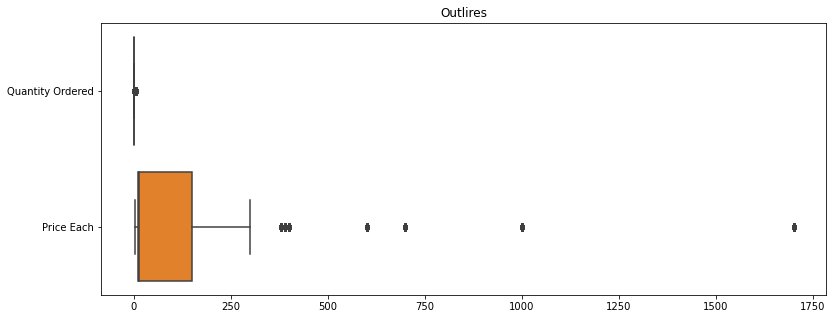

In [34]:

#Outliers

plt.figure(figsize=(13,5))
sns.boxplot(data=df[['Quantity Ordered', 'Price Each']], orient='h')
plt.title("Outlires")
plt.show()

# <a name=Questions>Questions</a>

What product sold the most?

Text(0, 0.5, 'count')

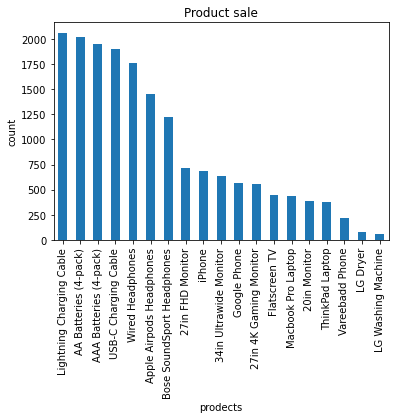

In [35]:
df['Product'].value_counts().plot(kind='bar')
plt.title("Product sale")
plt.xlabel("prodects")
plt.ylabel("count")

At any day seles increased?

Text(0, 0.5, 'count')

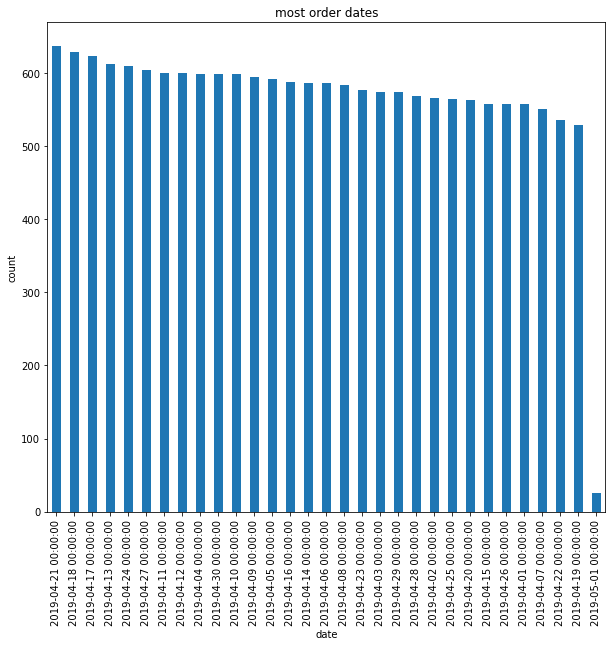

In [36]:
df['Date'].value_counts().plot(kind='bar',figsize=(10,9))
plt.title("most order dates")
plt.xlabel("date")
plt.ylabel("count")

depending in the above graph what is the highest day have earning in this month?

In [38]:
df["total"] = df["Price Each"] * df["Quantity Ordered"]

In [44]:
df.groupby('Date')['total'].sum().sort_values(ascending=False)

Date
2019-04-24    134626.89
2019-04-18    125081.79
2019-04-25    123566.20
2019-04-17    123413.57
2019-04-29    121033.16
2019-04-27    119669.61
2019-04-16    118495.82
2019-04-30    116675.87
2019-04-10    115162.97
2019-04-21    114617.87
2019-04-26    113381.00
2019-04-04    113194.95
2019-04-05    112287.31
2019-04-03    111138.76
2019-04-11    110804.25
2019-04-23    110319.98
2019-04-06    108157.27
2019-04-09    107500.92
2019-04-28    106760.63
2019-04-15    106237.03
2019-04-12    105422.71
2019-04-13    104927.54
2019-04-14    104037.33
2019-04-02    102827.18
2019-04-07    102482.20
2019-04-01    102034.76
2019-04-19     94399.71
2019-04-20     94078.02
2019-04-08     93114.11
2019-04-22     88657.66
2019-05-01     10397.34
Name: total, dtype: float64

Text(0, 0.5, 'price')

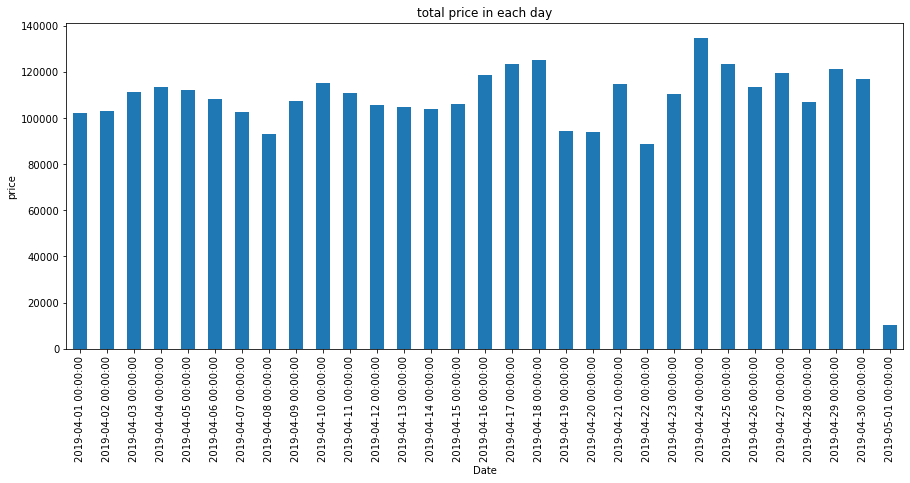

In [53]:
#plt.figure(figsize = (20,20)
df.groupby('Date')['total'].sum().plot(kind='bar',figsize=(15,6))
plt.title("total price in each day")

plt.ylabel("price")

# <a name=Qun>Qunclosion</a>